In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('placement.csv')
df.rename(columns={'placement_exam_marks':'mark'},inplace=True)
df.head(4)

,cgpa,mark,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1


In [50]:
df.shape

(1000, 3)

Text(0.5, 1.0, 'MARK')

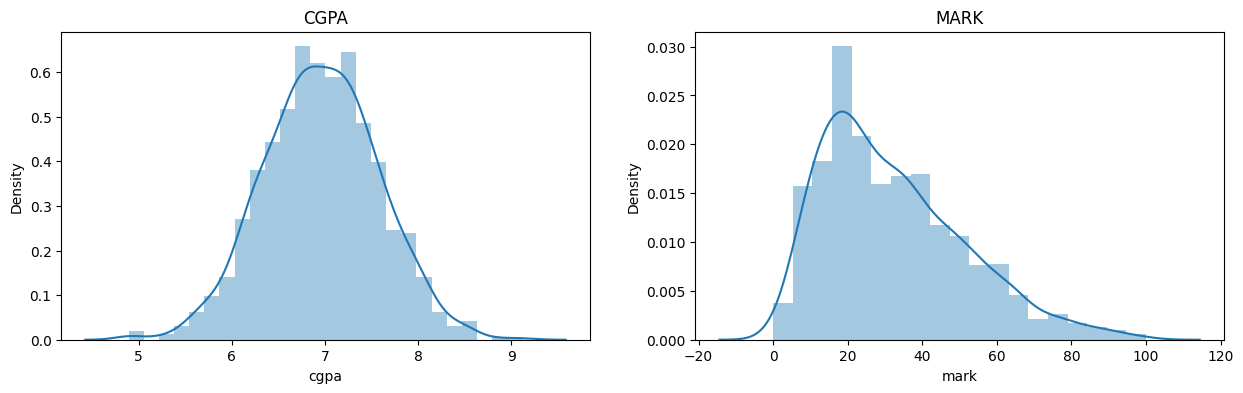

In [51]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.title('CGPA')

plt.subplot(1,2,2)
sns.distplot(df['mark'])
plt.title('MARK')

In [52]:
df['mark'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: mark, dtype: float64

In [53]:
df['mark'].skew()

0.8356419499466834

<AxesSubplot: >

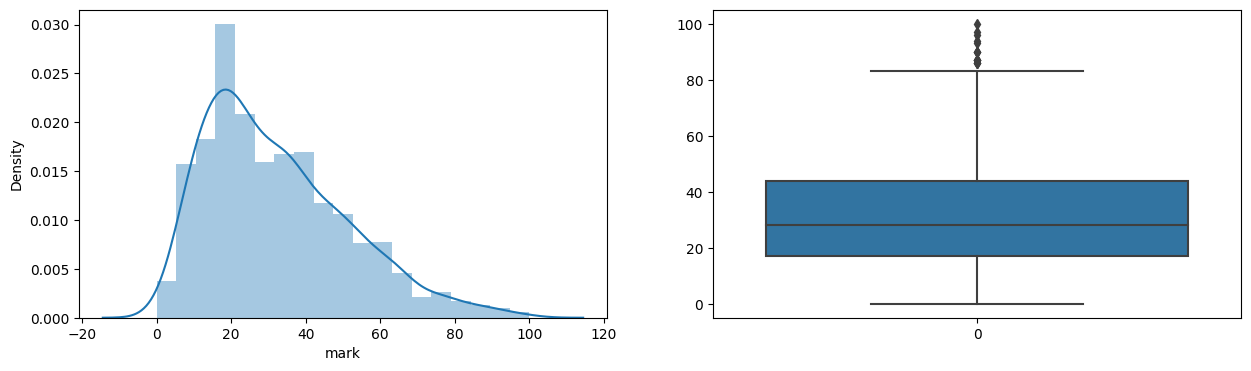

In [59]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['mark'])

plt.subplot(1,2,2)
sns.boxplot(df['mark'])

# Trimming

In [55]:
print('Mean',df['mark'].mean())
print('min',df['mark'].min())
print('Max',df['mark'].max())

Mean 32.225
min 0.0
Max 100.0


In [56]:
percentile25 = df['mark'].quantile(.25)
percentile75 = df['mark'].quantile(.75)

In [57]:
iqr = percentile75-percentile25
iqr

27.0

In [71]:
upper_limit = percentile75 + 1.5*iqr
upper_limit

84.5

In [70]:
lower_limit = percentile25 - 1.5*iqr
lower_limit

-23.5

In [76]:
df[df['mark'] > upper_limit]

,cgpa,mark,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [41]:
df['mark'] = np.where(
    df['mark'] > higher_limit,
    higher_limit, 
    np.where(
        df['mark']<lower_limit,
        lower_limit,
        df['mark']
    )
)

In [40]:
lower_limit =  percentile25 - 1.5*iqr
higher_limit =  percentile75 + 1.5*iqr

<AxesSubplot: >

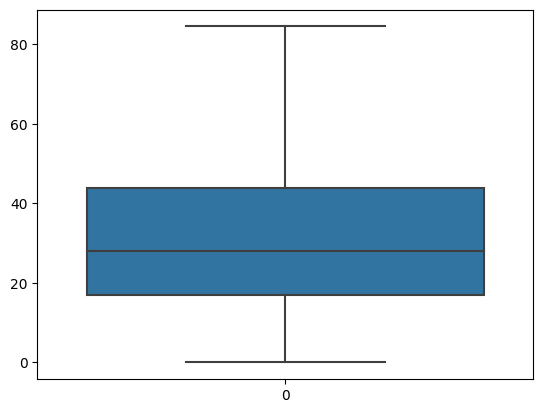

In [42]:
sns.boxplot(df['mark'])